In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
print("train")
print("x", x_train.shape)
print("y", y_train.shape)

print("test")
print("x", x_test.shape)
print("y", y_test.shape)

train
x (60000, 28, 28)
y (60000,)
test
x (10000, 28, 28)
y (10000,)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

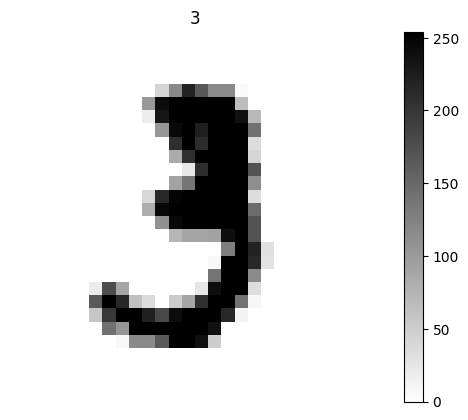

In [3]:
from matplotlib import pyplot as plt
number = 10 

plt.imshow(x_train[number,:,:], cmap="gray_r")
plt.title(y_train[number])
plt.colorbar()
plt.axis("off")

on normalise!!!!!!!!!!!!!!!!!!!!

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

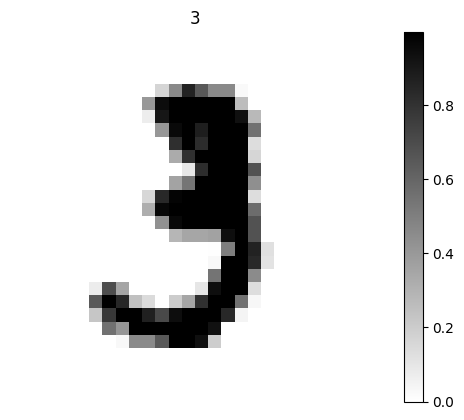

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

plt.imshow(x_train[number,:,:], cmap="gray_r")
plt.title(y_train[number])
plt.colorbar()
plt.axis("off")

(array([5923.,    0., 6742.,    0., 5958.,    0., 6131.,    0., 5842.,
           0., 5421.,    0., 5918.,    0., 6265.,    0., 5851.,    0.,
        5949.]),
 array([0.        , 0.47368421, 0.94736842, 1.42105263, 1.89473684,
        2.36842105, 2.84210526, 3.31578947, 3.78947368, 4.26315789,
        4.73684211, 5.21052632, 5.68421053, 6.15789474, 6.63157895,
        7.10526316, 7.57894737, 8.05263158, 8.52631579, 9.        ]),
 <BarContainer object of 19 artists>)

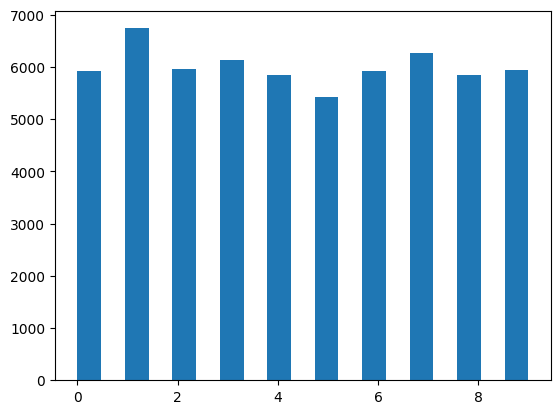

In [5]:
plt.hist(y_train, bins=19)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np 

x2_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x2_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))


In [7]:
model = LogisticRegression(max_iter=200)
model.fit(x2_train, y_train)

y_pred = model.predict(x2_test)


c:\Users\aboys\Documents\Simplon\Cours_Exos\Monitoring\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [9]:
28*28

784

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()
# input + 1ere couche caché
model.add(Dense(units=128, activation="relu", input_dim=784))
# model.add(Dense(units=64, activation="relu"))
# classifieur on cherche 10 classes 
model.add(Dense(units=10, activation="softmax"))


c:\Users\aboys\Documents\Simplon\Cours_Exos\Monitoring\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
history = model.fit(x2_train, y_train,
                    validation_data=(x2_test, y_test),
                    batch_size = 128,
                    epochs=50)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8328 - loss: 0.6087 - val_accuracy: 0.9440 - val_loss: 0.2010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9494 - loss: 0.1804 - val_accuracy: 0.9600 - val_loss: 0.1386
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1271 - val_accuracy: 0.9651 - val_loss: 0.1136
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0970 - val_accuracy: 0.9720 - val_loss: 0.0957
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9786 - loss: 0.0758 - val_accuracy: 0.9720 - val_loss: 0.0927
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0606 - val_accuracy: 0.9735 - val_loss: 0.0831
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9863 - loss: 0.0493 - val_accuracy: 0.9744 - val_loss: 0.0803
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0420 - val_accuracy: 0.

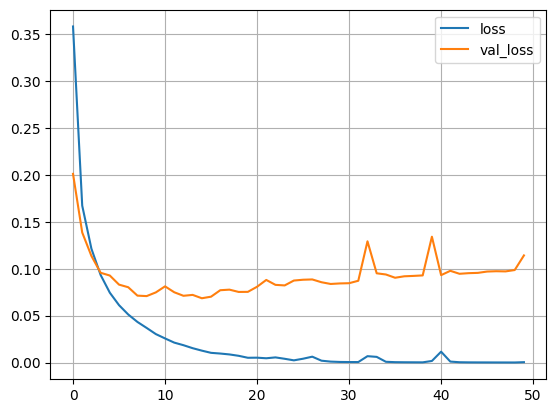

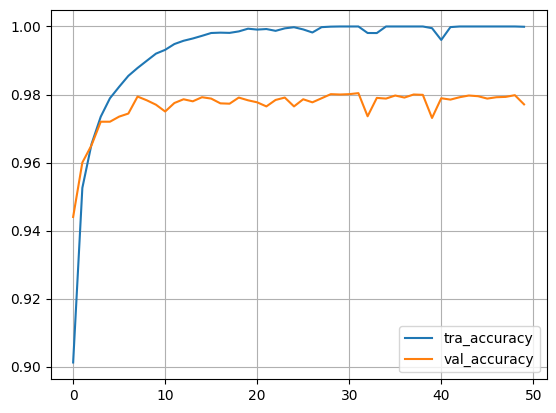

In [13]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.grid()
plt.legend()

plt.figure()
plt.plot(history.history["accuracy"], label="tra_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.grid()
plt.legend()

In [14]:
y_pred2 = model.predict(x2_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step


In [15]:
y_pred2.shape

(10000, 10)

Text(0.5, 1.0, '7')

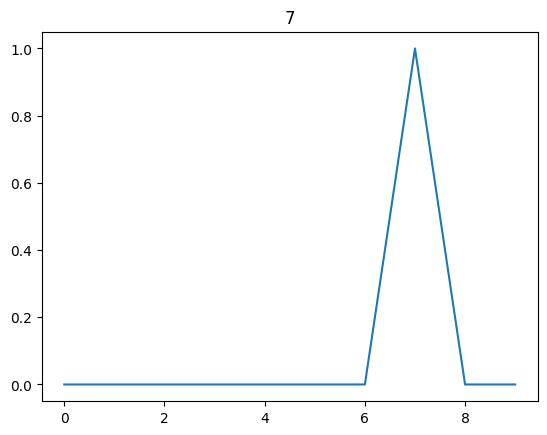

In [16]:
number = 0
plt.plot(y_pred2[number])
plt.title(y_test[number])

In [17]:
argmax_y_pred = np.argmax(y_pred2, axis=-1)
argmax_y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [18]:
print("Reg Log")
print(report)
print("rnn")
print(classification_report(y_test,argmax_y_pred))

Reg Log
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

rnn
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3

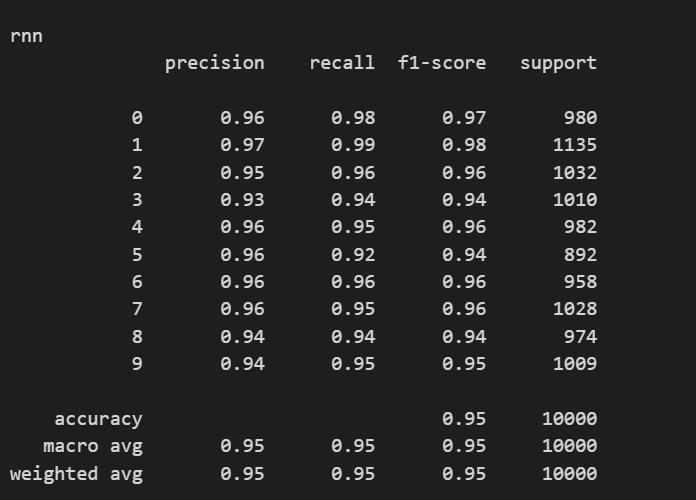

Autre couche

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

if False:
    model = Sequential()
    # input + 1ere couche caché
    model.add(Dense(units=128, activation="relu", input_dim=784))
    # model.add(Dense(units=64, activation="relu"))
    # classifieur on cherche 10 classes 
    model.add(Dense(units=10, activation="softmax"))

    model.compile(optimizer="adam", 
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

    history = model.fit(x2_train, y_train,
                        validation_data=(x2_test, y_test),
                        batch_size = 128,
                        epochs=50)

    y_pred2 = model.predict(x2_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.95      0.97      0.96       982
           5       0.96      0.97      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.94      0.95       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



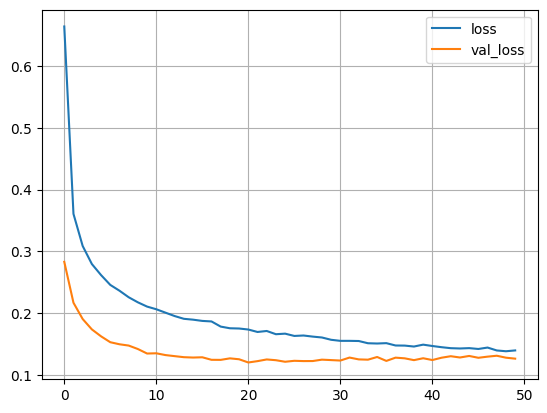

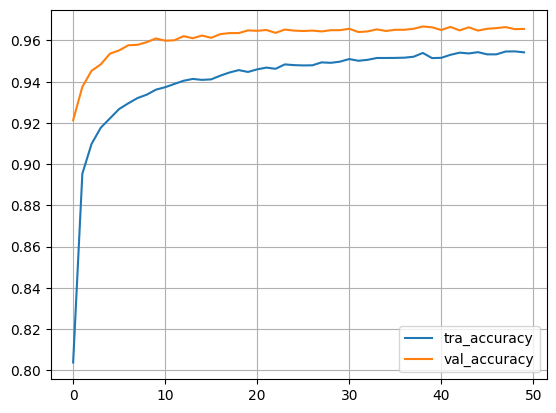

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout 

class MonModelClassif:
    def __init__(self, img_dim, nb_units, activation, nb_classe):
        """ initialise l'instance de la classe:
            1 - les attributs
            2 - Création du réseau de neurones
            3 - Compilation du réseau """
        # attributs de ma classe
        self.img_dim = img_dim # taille en x et y (size_x, size_y)
        self.nb_units = nb_units
        self.activation = activation
        self.nb_classe = nb_classe
        # Création du réseau de neurones
        self.MonReseau_creation()
        # Compilation du réseau
        self.MonReseau_compile()

    def MonReseau_creation(self):
        model = Sequential()
        # INPUT LAYER
        model.add(Input(self.img_dim))
        # HIDDEN LAYERS
        # le flatten va applatir l'image (28*28 -> 784*1)        
        # mais il a besoin de connaitre la taille de l'input qui est 28*28
        model.add(Flatten())
        model.add(Dense(units=self.nb_units,
                        activation=self.activation))
        model.add(Dropout(25/100))
        
        # OUTPUT LAYER
        model.add(Dense(units=self.nb_classe, activation="softmax"))
        self.model = model

    def MonReseau_compile(self):
        self.model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

    def train_model(self, x_train, y_train, x_test, y_test, batch_size=128, epochs=50, verbose=True):
        self.history = self.model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=verbose)
        
    def predire_proba(self, data):
        return self.model.predict(data)
    
    def predire(self, data):
        return np.argmax(self.model.predict(data), axis=-1)
    
    def plot_loss(self):
        plt.figure()
        plt.plot(self.history.history["loss"], label="loss")
        plt.plot(self.history.history["val_loss"], label="val_loss")
        plt.grid()
        plt.legend()

    def plot_metrics(self):
        plt.figure()
        plt.plot(self.history.history["accuracy"], label="tra_accuracy")
        plt.plot(self.history.history["val_accuracy"], label="val_accuracy")
        plt.grid()
        plt.legend()


# creation d'un objet, qui est une instance de la classe MonModel
model = MonModelClassif((28,28), 32, "relu", 10) # instanciation de la classe bahhh il faut que ça s'initialise

model.train_model(x_train, y_train, x_test, y_test, verbose=False)

ypred_classe = model.predire(x_test)

print(classification_report(y_test, ypred_classe))

model.plot_loss()

model.plot_metrics()

Reseau de NEURONES CONVOLUTIF ! 

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.models import Model
class MonModelClassifConvol:
    def __init__(self, img_dim, nb_units, activation, nb_classe):
        """ initialise l'instance de la classe:
            1 - les attributs
            2 - Création du réseau de neurones
            3 - Compilation du réseau """
        # attributs de ma classe
        self.img_dim = img_dim # taille en x et y (size_x, size_y)
        self.nb_units = nb_units
        self.activation = activation
        self.nb_classe = nb_classe
        # Création du réseau de neurones
        self.MonReseau_creation()
        # Compilation du réseau
        self.MonReseau_compile()

    def MonReseau_creation(self):
        # version sequentiel
        model = Sequential()
        # INPUT LAYER
        model.add(Input(self.img_dim))
        # HIDDEN LAYERS
        model.add(Conv2D(filters=32,
                         kernel_size=(3,3),
                         activation=self.activation,
                         padding="same"))
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Dropout(25/100))

        model.add(Conv2D(filters=16,
                         kernel_size=(3,3),
                         activation=self.activation,
                         padding="same"))
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Dropout(25/100))

        # OUTPUT LAYER
        model.add(Flatten())
        model.add(Dense(units=self.nb_classe, activation="softmax"))
        self.model = model

        # # version fonctionnel qui évite natuellement le bug dans get_layer_output
        # # Définir l'entrée
        # inputs = Input(shape=self.img_dim)
        # # Couches convolutives
        # x = Conv2D(filters=32, kernel_size=(3, 3), activation=self.activation, padding="same", name="conv2d_1")(inputs)
        # x = MaxPool2D(pool_size=(2, 2))(x)
        # x = Dropout(25 / 100)(x)

        # x = Conv2D(filters=16, kernel_size=(3, 3), activation=self.activation, padding="same", name="conv2d_2")(x)
        # x = MaxPool2D(pool_size=(2, 2))(x)
        # x = Dropout(25 / 100)(x)

        # # Couche de sortie
        # x = Flatten()(x)
        # outputs = Dense(units=self.nb_classe, activation="softmax")(x)
        # Créer le modèle
        # self.model = Model(inputs=inputs, outputs=outputs)

    def MonReseau_compile(self):
        self.model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

    def train_model(self, x_train, y_train, x_test, y_test, batch_size=128, epochs=50, verbose=True):
        self.history = self.model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=verbose)
        
    def predire_proba(self, data):
        return self.model.predict(data)
    
    def predire(self, data):
        return np.argmax(self.model.predict(data), axis=-1)
    
    def plot_loss(self):
        plt.figure()
        plt.plot(self.history.history["loss"], label="loss")
        plt.plot(self.history.history["val_loss"], label="val_loss")
        plt.grid()
        plt.legend()

    def plot_metrics(self):
        plt.figure()
        plt.plot(self.history.history["accuracy"], label="tra_accuracy")
        plt.plot(self.history.history["val_accuracy"], label="val_accuracy")
        plt.grid()
        plt.legend()

    def get_layer_output(self, data, layer_name):
        """Renvoie la sortie d'une couche spécifique pour des données données."""
        # Liste des couches pour debug
        layer_names = [layer.name for layer in self.model.layers]
        if layer_name not in layer_names:
            raise ValueError(f"Layer name '{layer_name}' not found. Available layers: {layer_names}")

        intermediate_layer_model = Model([self.model.inputs],
                                             outputs=self.model.get_layer(layer_name).output)
        return intermediate_layer_model.predict(data)
    


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



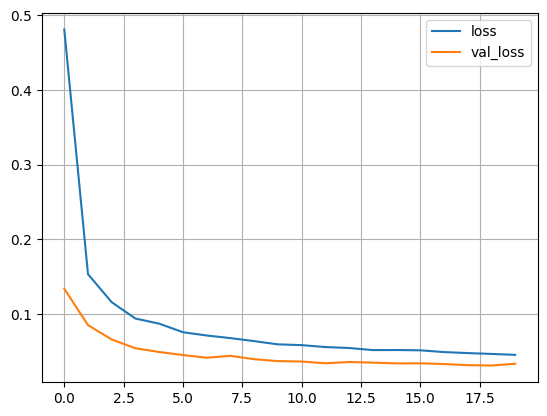

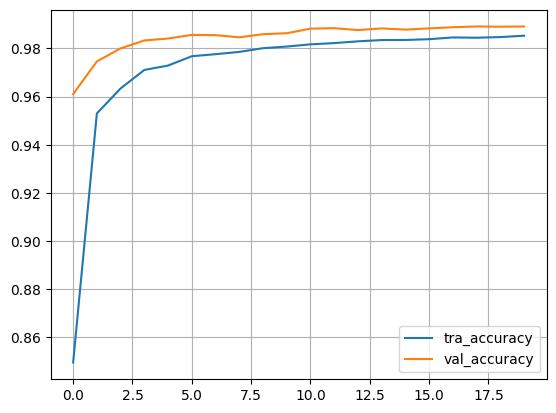

In [22]:

(x_tra, y_tra), (x_tes, y_tes) = mnist.load_data()

x_tra = np.expand_dims(x_tra, axis=-1).astype("float32")/255.0
x_tes = np.expand_dims(x_tes, axis=-1).astype("float32")/255.0

# creation d'un objet, qui est une instance de la classe MonModel
model = MonModelClassifConvol((28,28,1), 32, "relu", 10) # instanciation de la classe bahhh il faut que ça s'initialise

model.train_model(x_tra, y_tra, x_tes, y_tes, verbose=False, epochs=20)

ypred_classe = model.predire(x_tes)

print(classification_report(y_tes, ypred_classe))

model.plot_loss()

model.plot_metrics()

In [23]:
model.model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,384 (149.94 KB)

 Trainable params: 12,794 (49.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,590 (99.96 KB)

In [24]:
if False:
    model.train_model(x_tra, y_tra, x_tes, y_tes, verbose=False, epochs=10)

    ypred_classe = model.predire(x_tes)

    print(classification_report(y_tes, ypred_classe))

    model.plot_loss()

    model.plot_metrics()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


c:\Users\aboys\Documents\Simplon\Cours_Exos\Monitoring\.venv\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_15']]
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


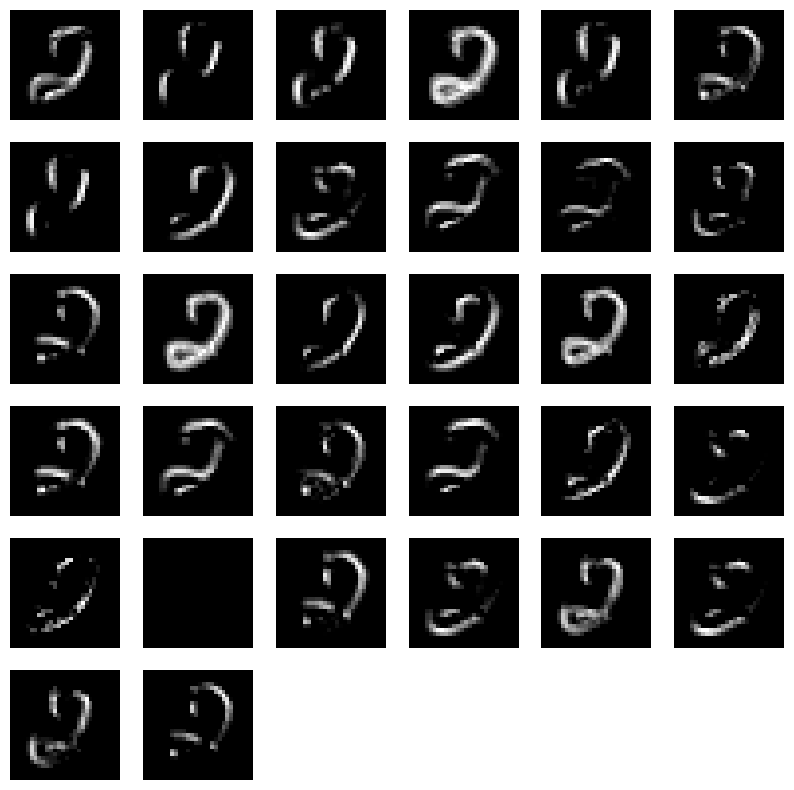

In [25]:


# Obtenir la sortie de la première couche de convolution pour la première image du jeu de test
layer_output = model.get_layer_output(x_tes[400:401], 'conv2d')  
# 'conv2d' est le nom de la couche
# max_pooling2d 

# Visualiser la sortie
plt.figure(figsize=(10, 10))
for i in range(32):  # 32 filtres dans la première couche de convolution
    plt.subplot(6, 6, i + 1)
    plt.imshow(layer_output[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()